In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import mobilenet, resnet, resnet_v2, MobileNet, ResNet50, ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Exploration

In [2]:
dir = 'data/Fish_Dataset/Fish_Dataset'
label = []
path = []

for dirname, _, filenames in os.walk(dir):
    for filename in filenames:
        if os.path.splitext(filename)[1] == '.png':
            if dirname.split()[-1] != 'GT':          
                label.append(os.path.split(dirname)[1])
                path.append(os.path.join(dirname,filename))

df = pd.DataFrame(columns=['path', 'label'])
df['path'] = path
df['label'] = label

df = df[df['label'] != 'Shrimp']
df = df.reset_index(drop = True)

In [3]:
df

,path,label
0,data/Fish_Dataset/Fish_Dataset\Black Sea Sprat...,Black Sea Sprat
1,data/Fish_Dataset/Fish_Dataset\Black Sea Sprat...,Black Sea Sprat
2,data/Fish_Dataset/Fish_Dataset\Black Sea Sprat...,Black Sea Sprat
3,data/Fish_Dataset/Fish_Dataset\Black Sea Sprat...,Black Sea Sprat
4,data/Fish_Dataset/Fish_Dataset\Black Sea Sprat...,Black Sea Sprat
...,...,...
7995,data/Fish_Dataset/Fish_Dataset\Trout\Trout\009...,Trout
7996,data/Fish_Dataset/Fish_Dataset\Trout\Trout\009...,Trout
7997,data/Fish_Dataset/Fish_Dataset\Trout\Trout\009...,Trout
7998,data/Fish_Dataset/Fish_Dataset\Trout\Trout\009...,Trout


In [4]:
df['label'] = df['label'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   path    8000 non-null   object  
 1   label   8000 non-null   category
dtypes: category(1), object(1)
memory usage: 70.8+ KB


In [6]:
df['label'].unique()

['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Striped Red Mullet', 'Trout']
Categories (8, object): ['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Striped Red Mullet', 'Trout']

In [7]:
df['label'].value_counts()

label
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Striped Red Mullet    1000
Trout                 1000
Name: count, dtype: int64

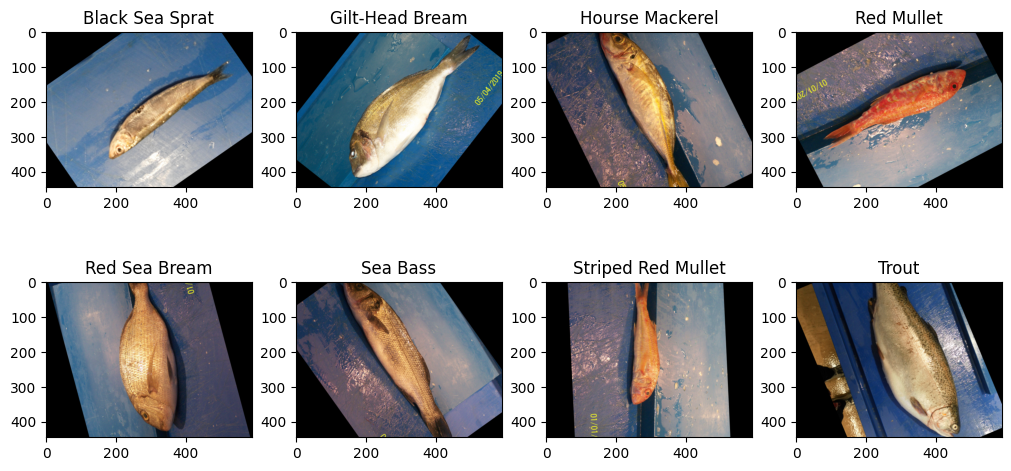

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(10, 5), constrained_layout=True)
ax = ax.flatten()

j = 0
for i in df['label'].unique():
    ax[j].imshow(plt.imread(df[df['label'] == i].iloc[0,0]))
    ax[j].set_title(i)
    j = j+1

In [9]:
plt.imread(df['path'][1]).shape

(445, 590, 3)

# Data Preprocessing

In [10]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)

(6400, 2)
(1600, 2)


In [12]:
#def preprocess_image(data_train, data_test, preprocess_input):
#    train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                   validation_split=0.3)
#    test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

#    X_train_img = train_gen.flow_from_dataframe(dataframe=data_train, x_col='path', y_col='label',class_mode='categorical', subset='training', color_mode='rgb', batch_size=32)
#    X_val_img = train_gen.flow_from_dataframe(dataframe=data_train, x_col='path', y_col='label',class_mode='categorical', subset='validation', color_mode='rgb', batch_size=32)
#    X_test_img = test_gen.flow_from_dataframe(dataframe=data_test, x_col='path', y_col='label',class_mode='categorical', color_mode='rgb', batch_size=32)

#    return X_train_img, X_val_img, X_test_img

In [13]:
#mobnet_preprocess = mobilenet.preprocess_input
#resnet_preprocess = resnet.preprocess_input
#resnetv2_preprocess = resnet_v2.preprocess_input

## MobileNet

In [14]:
#X_train_img_mobnet, X_val_img_mobnet, X_test_img_mobnet = preprocess_image(X_train, X_test, mobnet_preprocess)

train_gen = ImageDataGenerator(preprocessing_function=mobilenet.preprocess_input, validation_split=0.3)
test_gen = ImageDataGenerator(preprocessing_function=mobilenet.preprocess_input)

X_train_img_mobnet = train_gen.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='training', color_mode='rgb', batch_size=32)
X_val_img_mobnet = train_gen.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='validation', color_mode='rgb', batch_size=32)
X_test_img_mobnet = test_gen.flow_from_dataframe(dataframe=X_test, x_col='path', y_col='label',class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)

Found 4480 validated image filenames belonging to 8 classes.
Found 1920 validated image filenames belonging to 8 classes.
Found 1600 validated image filenames belonging to 8 classes.


## ResNet50

In [15]:
#X_train_img_resnet, X_val_img_resnet, X_test_img_resnet = preprocess_image(X_train, X_test, resnet_preprocess)

train_gen = ImageDataGenerator(preprocessing_function=resnet.preprocess_input, validation_split=0.3)
test_gen = ImageDataGenerator(preprocessing_function=resnet.preprocess_input)

X_train_img_resnet = train_gen.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='training', color_mode='rgb', batch_size=32)
X_val_img_resnet = train_gen.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='validation', color_mode='rgb', batch_size=32)
X_test_img_resnet = test_gen.flow_from_dataframe(dataframe=X_test, x_col='path', y_col='label',class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)

Found 4480 validated image filenames belonging to 8 classes.
Found 1920 validated image filenames belonging to 8 classes.
Found 1600 validated image filenames belonging to 8 classes.


## ResNet50V2

In [16]:
#X_train_img_resnetv2, X_val_img_resnetv2, X_test_img_resnetv2 = preprocess_image(X_train, X_test, resnetv2_preprocess)

train_gen = ImageDataGenerator(preprocessing_function=resnet_v2.preprocess_input, validation_split=0.3)
test_gen = ImageDataGenerator(preprocessing_function=resnet_v2.preprocess_input)

X_train_img_resnetv2 = train_gen.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='training', color_mode='rgb', batch_size=32)
X_val_img_resnetv2 = train_gen.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='validation', color_mode='rgb', batch_size=32)
X_test_img_resnetv2 = test_gen.flow_from_dataframe(dataframe=X_test, x_col='path', y_col='label',class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)

Found 4480 validated image filenames belonging to 8 classes.
Found 1920 validated image filenames belonging to 8 classes.
Found 1600 validated image filenames belonging to 8 classes.


## Image After Preprocessing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


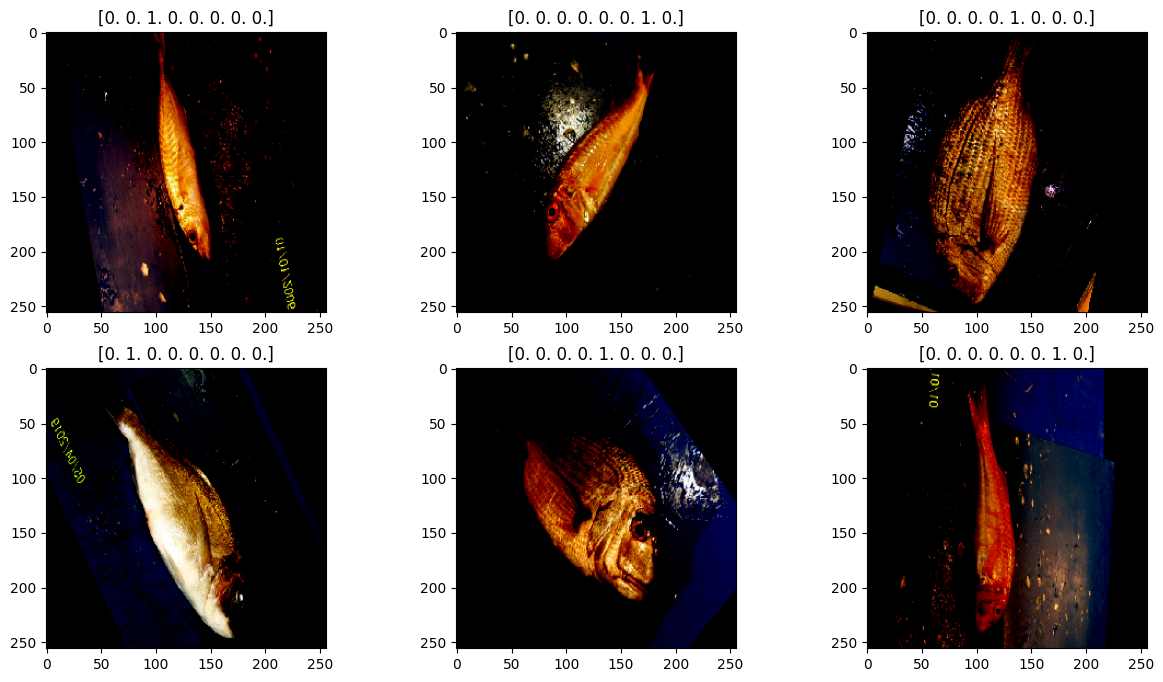

In [17]:
fit, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax = ax.flatten()

j = 0
for _ in range(6):
    img, label = X_test_img_mobnet.next() # change here to see different images
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    j += 1

# Modeling

In [18]:
def create_model(pretrained_model, image_shape, num_classes=8):
  pre_trained = pretrained_model(include_top=False, pooling='avg', input_shape=image_shape)
  pre_trained.trainable = False

  input_model = pre_trained.input
  x = Dense(128, activation='relu')(pre_trained.output)
  x = Dropout(0.5)(x)
  #x = Dense(128, activation='relu')(x)
  #x = Dropout(0.5)(x)
  output_model = Dense(num_classes, activation='softmax')(x)

  model = Model(inputs=input_model, outputs=output_model)

  model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])

  return model

In [19]:
image_shape = X_test_img_mobnet[0][0].shape[1:]

early_stop = EarlyStopping(monitor='val_loss', patience=1)

## MobileNet

In [20]:
model_mobnet = create_model(MobileNet, image_shape)

In [21]:
results_mobnet = model_mobnet.fit(X_train_img_mobnet, 
                                  epochs=30, 
                                  validation_data=X_val_img_mobnet, 
                                  callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 48s 322ms/step - loss: 0.6392 - accuracy: 0.7850 - val_loss: 0.0837 - val_accuracy: 0.9891
Epoch 2/30
140/140 [==============================] - 43s 309ms/step - loss: 0.1338 - accuracy: 0.9621 - val_loss: 0.0311 - val_accuracy: 0.9984
Epoch 3/30
140/140 [==============================] - 45s 318ms/step - loss: 0.0720 - accuracy: 0.9824 - val_loss: 0.0179 - val_accuracy: 0.9979
Epoch 4/30
140/140 [==============================] - 45s 322ms/step - loss: 0.0491 - accuracy: 0.9893 - val_loss: 0.0124 - val_accuracy: 0.9984
Epoch 5/30
140/140 [==============================] - 43s 311ms/step - loss: 0.0364 - accuracy: 0.9922 - val_loss: 0.0088 - val_accuracy: 0.9990
Epoch 6/30
140/140 [==============================] - 43s 309ms/step - loss: 0.0345 - accuracy: 0.9915 - val_loss: 0.0061 - val_accuracy: 0.9995
Epoch 7/30
140/140 [==============================] - 42s 303ms/step - loss: 0.0251 - accuracy: 0.9942 - val_loss: 0.0057 - val_ac

## ResNet50

In [22]:
model_resnet = create_model(ResNet50, image_shape)

In [23]:
results_resnet = model_resnet.fit(X_train_img_resnet,
                                  epochs=30, 
                                  validation_data=X_val_img_resnet, 
                                  callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 48s 323ms/step - loss: 0.5850 - accuracy: 0.8112 - val_loss: 0.0480 - val_accuracy: 0.9948
Epoch 2/30
140/140 [==============================] - 45s 320ms/step - loss: 0.1181 - accuracy: 0.9670 - val_loss: 0.0225 - val_accuracy: 0.9984
Epoch 3/30
140/140 [==============================] - 45s 325ms/step - loss: 0.0769 - accuracy: 0.9786 - val_loss: 0.0102 - val_accuracy: 0.9984
Epoch 4/30
140/140 [==============================] - 45s 324ms/step - loss: 0.0541 - accuracy: 0.9871 - val_loss: 0.0076 - val_accuracy: 0.9995
Epoch 5/30
140/140 [==============================] - 45s 318ms/step - loss: 0.0383 - accuracy: 0.9900 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/30
140/140 [==============================] - 45s 325ms/step - loss: 0.0291 - accuracy: 0.9926 - val_loss: 0.0040 - val_accuracy: 0.9990


## ResNet50V2

In [24]:
model_resnetv2 = create_model(ResNet50V2, image_shape)

In [25]:
results_resnetv2 = model_resnetv2.fit(X_train_img_resnetv2,
                                      epochs=30, 
                                      validation_data=X_val_img_resnetv2, 
                                      callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 47s 316ms/step - loss: 0.4870 - accuracy: 0.8310 - val_loss: 0.0665 - val_accuracy: 0.9818
Epoch 2/30
140/140 [==============================] - 44s 317ms/step - loss: 0.1312 - accuracy: 0.9587 - val_loss: 0.0387 - val_accuracy: 0.9906
Epoch 3/30
140/140 [==============================] - 44s 311ms/step - loss: 0.0714 - accuracy: 0.9777 - val_loss: 0.0255 - val_accuracy: 0.9927
Epoch 4/30
140/140 [==============================] - 45s 324ms/step - loss: 0.0468 - accuracy: 0.9871 - val_loss: 0.0270 - val_accuracy: 0.9906


## Accuracy & Loss Plot

In [26]:
def plot_results(results_list, model_names):
    fig, axes = plt.subplots(nrows=len(results_list), ncols=2, figsize=(15, 5 * len(results_list)))

    if len(results_list) == 1:
        axes = [axes]

    for i, (result, model_name) in enumerate(zip(results_list, model_names)):
        result_df = pd.DataFrame(result.history)
        
        axes[i][0].plot(result_df[['accuracy', 'val_accuracy']])
        axes[i][0].set_title(f"{model_name} - Accuracy")
        axes[i][0].legend(['train', 'val'])

        axes[i][1].plot(result_df[['loss', 'val_loss']])
        axes[i][1].set_title(f"{model_name} - Loss")
        axes[i][1].legend(['train', 'val'])

    plt.tight_layout()
    plt.show()

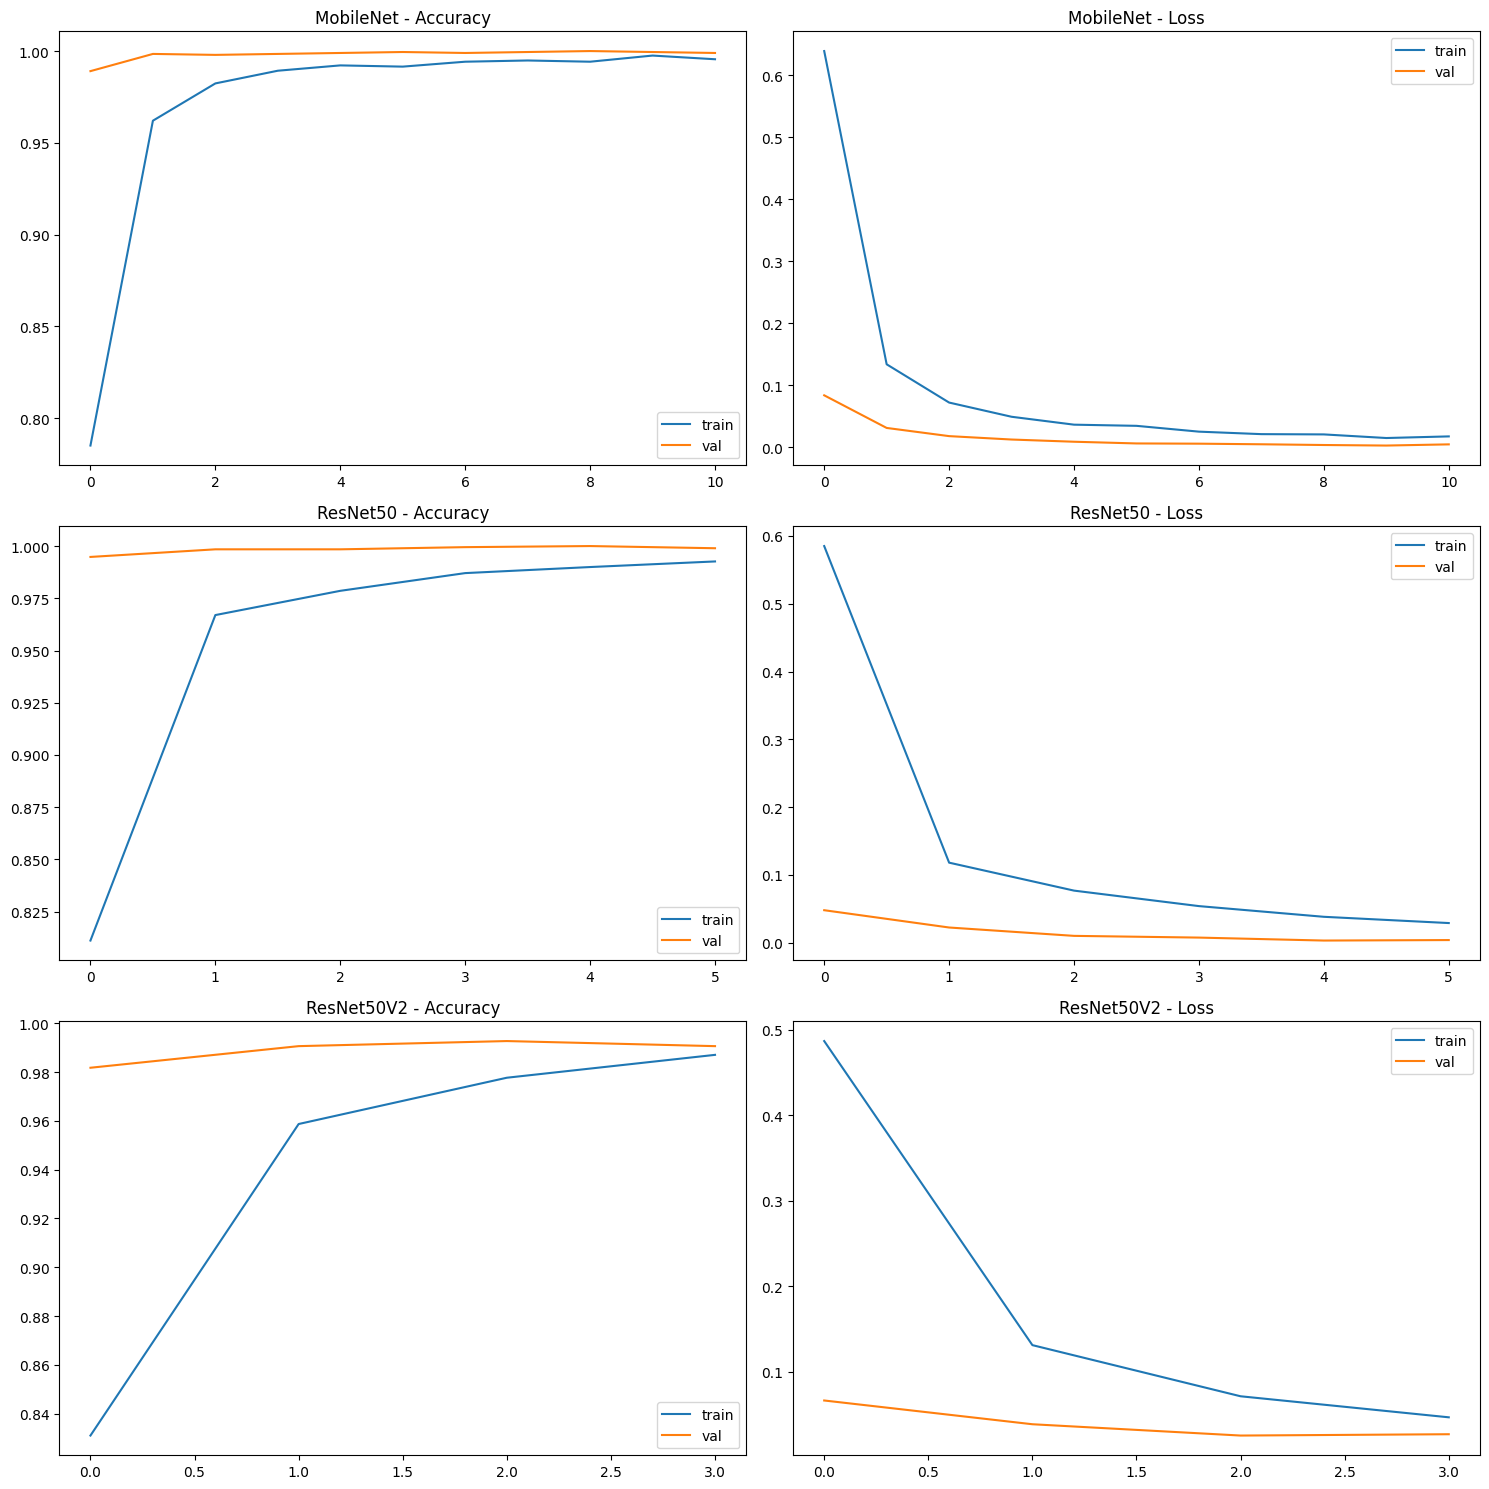

In [27]:
results_list = [results_mobnet, results_resnet, results_resnetv2]
model_names = ['MobileNet', 'ResNet50', 'ResNet50V2']

plot_results(results_list, model_names)

# Model Evaluation

In [28]:
def evaluate_model(model, X_test_img, X_test_df):
  pred = model.predict(X_test_img)
  pred = np.argmax(pred, axis=1)

  pred_df = X_test_df.copy()
  labels = {}

  for l, v in X_test_img.class_indices.items():
      labels.update({v:l})

  pred_df['pred'] = pred
  pred_df['pred'] = pred_df['pred'].apply(lambda x: labels[x])

  #print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
  print(classification_report(pred_df['label'],pred_df['pred']))

  sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')
  plt.show()

## MobileNet

50/50 [==============================] - 13s 257ms/step
                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       203
   Gilt-Head Bream       1.00      1.00      1.00       222
   Hourse Mackerel       1.00      1.00      1.00       196
        Red Mullet       0.99      1.00      1.00       183
     Red Sea Bream       1.00      1.00      1.00       200
          Sea Bass       1.00      1.00      1.00       197
Striped Red Mullet       1.00      1.00      1.00       207
             Trout       1.00      1.00      1.00       192

          accuracy                           1.00      1600
         macro avg       1.00      1.00      1.00      1600
      weighted avg       1.00      1.00      1.00      1600



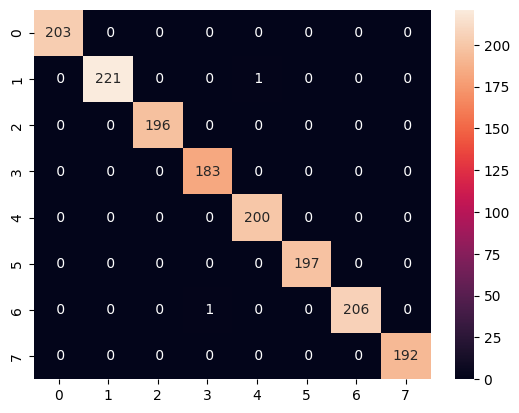

In [29]:
evaluate_model(model_mobnet, X_test_img_mobnet, X_test)

## ResNet50

50/50 [==============================] - 12s 221ms/step
                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       203
   Gilt-Head Bream       1.00      1.00      1.00       222
   Hourse Mackerel       1.00      1.00      1.00       196
        Red Mullet       1.00      1.00      1.00       183
     Red Sea Bream       1.00      1.00      1.00       200
          Sea Bass       1.00      1.00      1.00       197
Striped Red Mullet       1.00      1.00      1.00       207
             Trout       1.00      1.00      1.00       192

          accuracy                           1.00      1600
         macro avg       1.00      1.00      1.00      1600
      weighted avg       1.00      1.00      1.00      1600



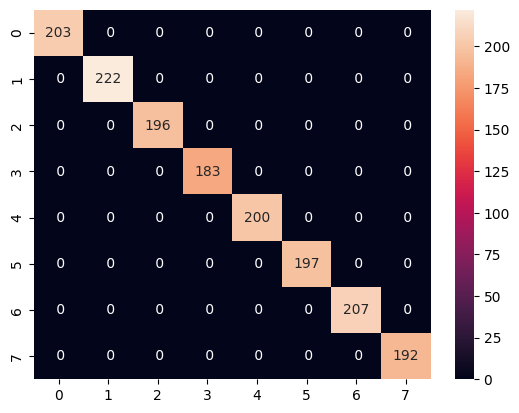

In [30]:
evaluate_model(model_resnet, X_test_img_resnet, X_test)

## ResNet50V2

50/50 [==============================] - 11s 198ms/step
                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       203
   Gilt-Head Bream       0.99      1.00      1.00       222
   Hourse Mackerel       1.00      1.00      1.00       196
        Red Mullet       0.95      1.00      0.97       183
     Red Sea Bream       1.00      0.99      1.00       200
          Sea Bass       1.00      0.99      1.00       197
Striped Red Mullet       1.00      0.95      0.97       207
             Trout       1.00      1.00      1.00       192

          accuracy                           0.99      1600
         macro avg       0.99      0.99      0.99      1600
      weighted avg       0.99      0.99      0.99      1600



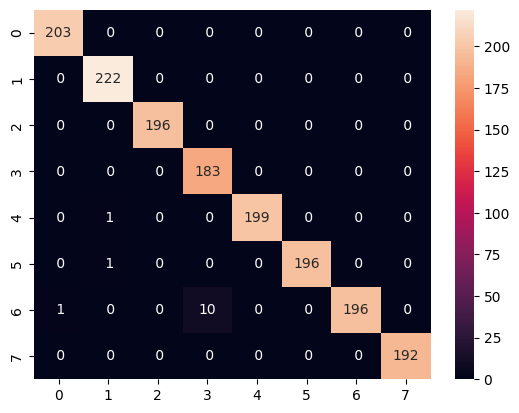

In [31]:
evaluate_model(model_resnetv2, X_test_img_resnetv2, X_test)

In [32]:
# save each model to keras model
model_mobnet.save('mobnet.keras')
model_resnet.save('resnet.keras')
model_resnetv2.save('resnetv2.keras')